In [2]:
# Cargamos las librerías necesarias y el dataframe

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

df=pd.read_csv(r'..\data\2_processed\processed_db.csv')

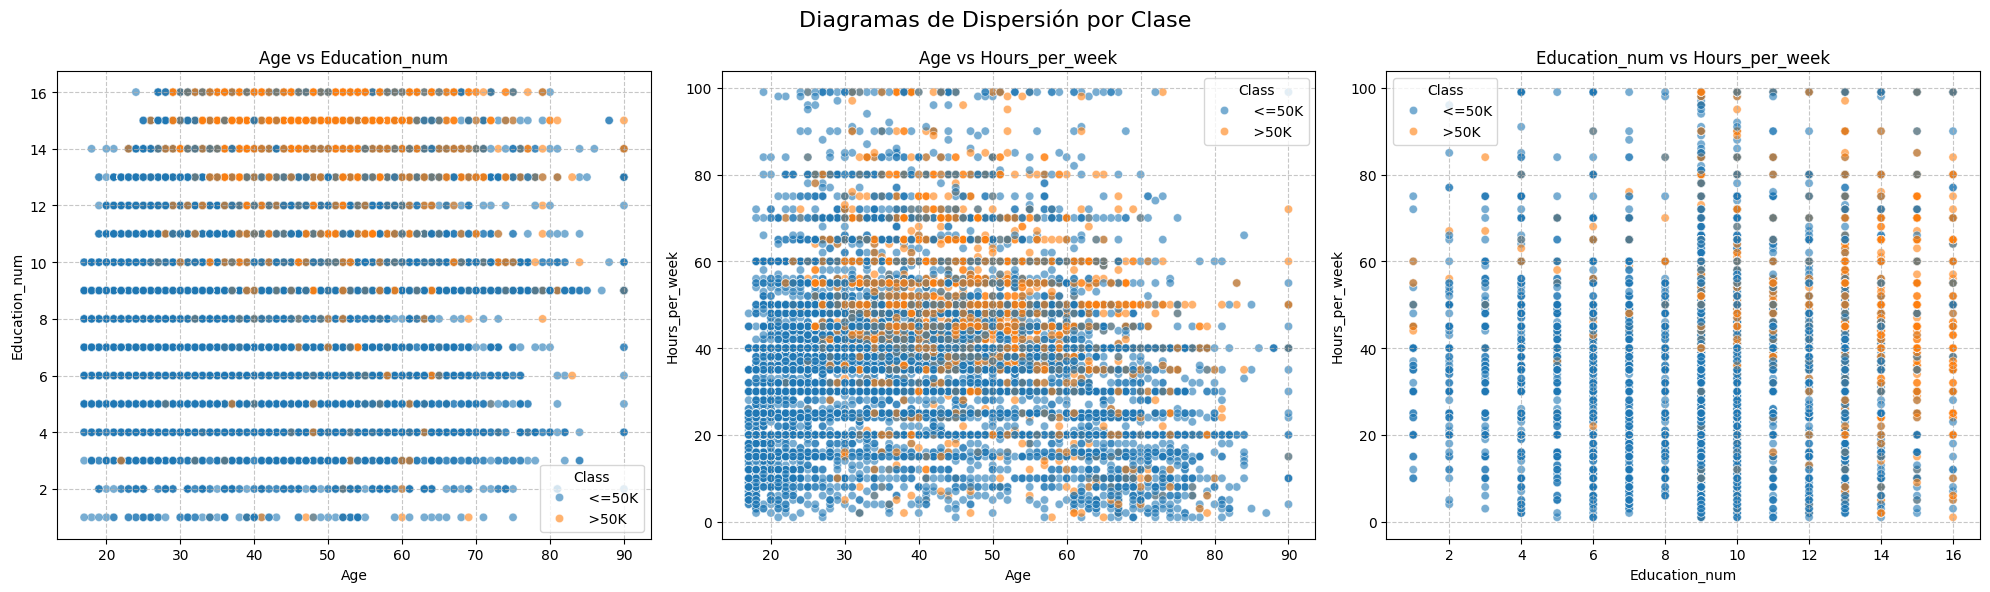

In [3]:
# Seleccionamos las columnas de interés
columns_of_interest = ['Age', 'Education_num', 'Hours_per_week', 'Class']
df_selected = df[columns_of_interest]

# Obtenemos las combinaciones de variables numéricas para los scatter plots
numeric_columns = ['Age', 'Education_num', 'Hours_per_week']
combinations_list = list(combinations(numeric_columns, 2))

# Creamos una figura con subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Diagramas de Dispersión por Clase', fontsize=16)

# Creamos un scatter plot para cada combinación de variables
for idx, (x_var, y_var) in enumerate(combinations_list):
    sns.scatterplot(data=df_selected, 
                   x=x_var, 
                   y=y_var, 
                   hue='Class',
                   alpha=0.6,
                   ax=axes[idx])
    
    axes[idx].set_title(f'{x_var} vs {y_var}')
    axes[idx].grid(True, linestyle='--', alpha=0.7)

# Ajustamos el layout
plt.tight_layout()
plt.show()

<font size="9" color="red">Basado en los diagramas de dispersión:</font>

## Age vs Education_num.

- Se observa un patrón de líneas horizontales debido a que Education_num es una variable discreta (valores enteros del 1 al 16)

- No hay una clara correlación entre edad y nivel educativo

- Hay una ligera tendencia a encontrar personas con salarios >50K (puntos naranjas) en niveles educativos más altos (>12)

- La distribución de edad es bastante amplia para todos los niveles educativos

## Age vs Hours_per_week.

- Existe una gran concentración de puntos alrededor de las 40 horas semanales, lo que sugiere que es el horario laboral más común

- Las personas con salarios >50K (puntos naranjas) tienden a trabajar más horas por semana

- La dispersión es mayor en las horas trabajadas para edades entre 30-60 años

- Hay algunos valores atípicos que trabajan más de 80 horas por semana

## Education_num vs Hours_per_week.

- Se observa una distribución vertical por cada nivel educativo debido a la naturaleza discreta de Education_num

- No hay una correlación fuerte entre nivel educativo y horas trabajadas. Sin embargo, hay una ligera tendencia a encontrar más personas con salarios >50K en niveles educativos más altos y que trabajan más horas

- La mayoría de los puntos se concentran entre 35-45 horas semanales independientemente del nivel educativo

## En general, estos gráficos sugieren que:

- El salario >50K está más relacionado con el nivel educativo que con la edad o las horas trabajadas

- La mayoría de las personas trabajan alrededor de 40 horas semanales

- No hay una relación lineal clara entre ninguna de estas variables

- La educación parece ser el factor más distintivo para predecir si alguien gana más de 50K

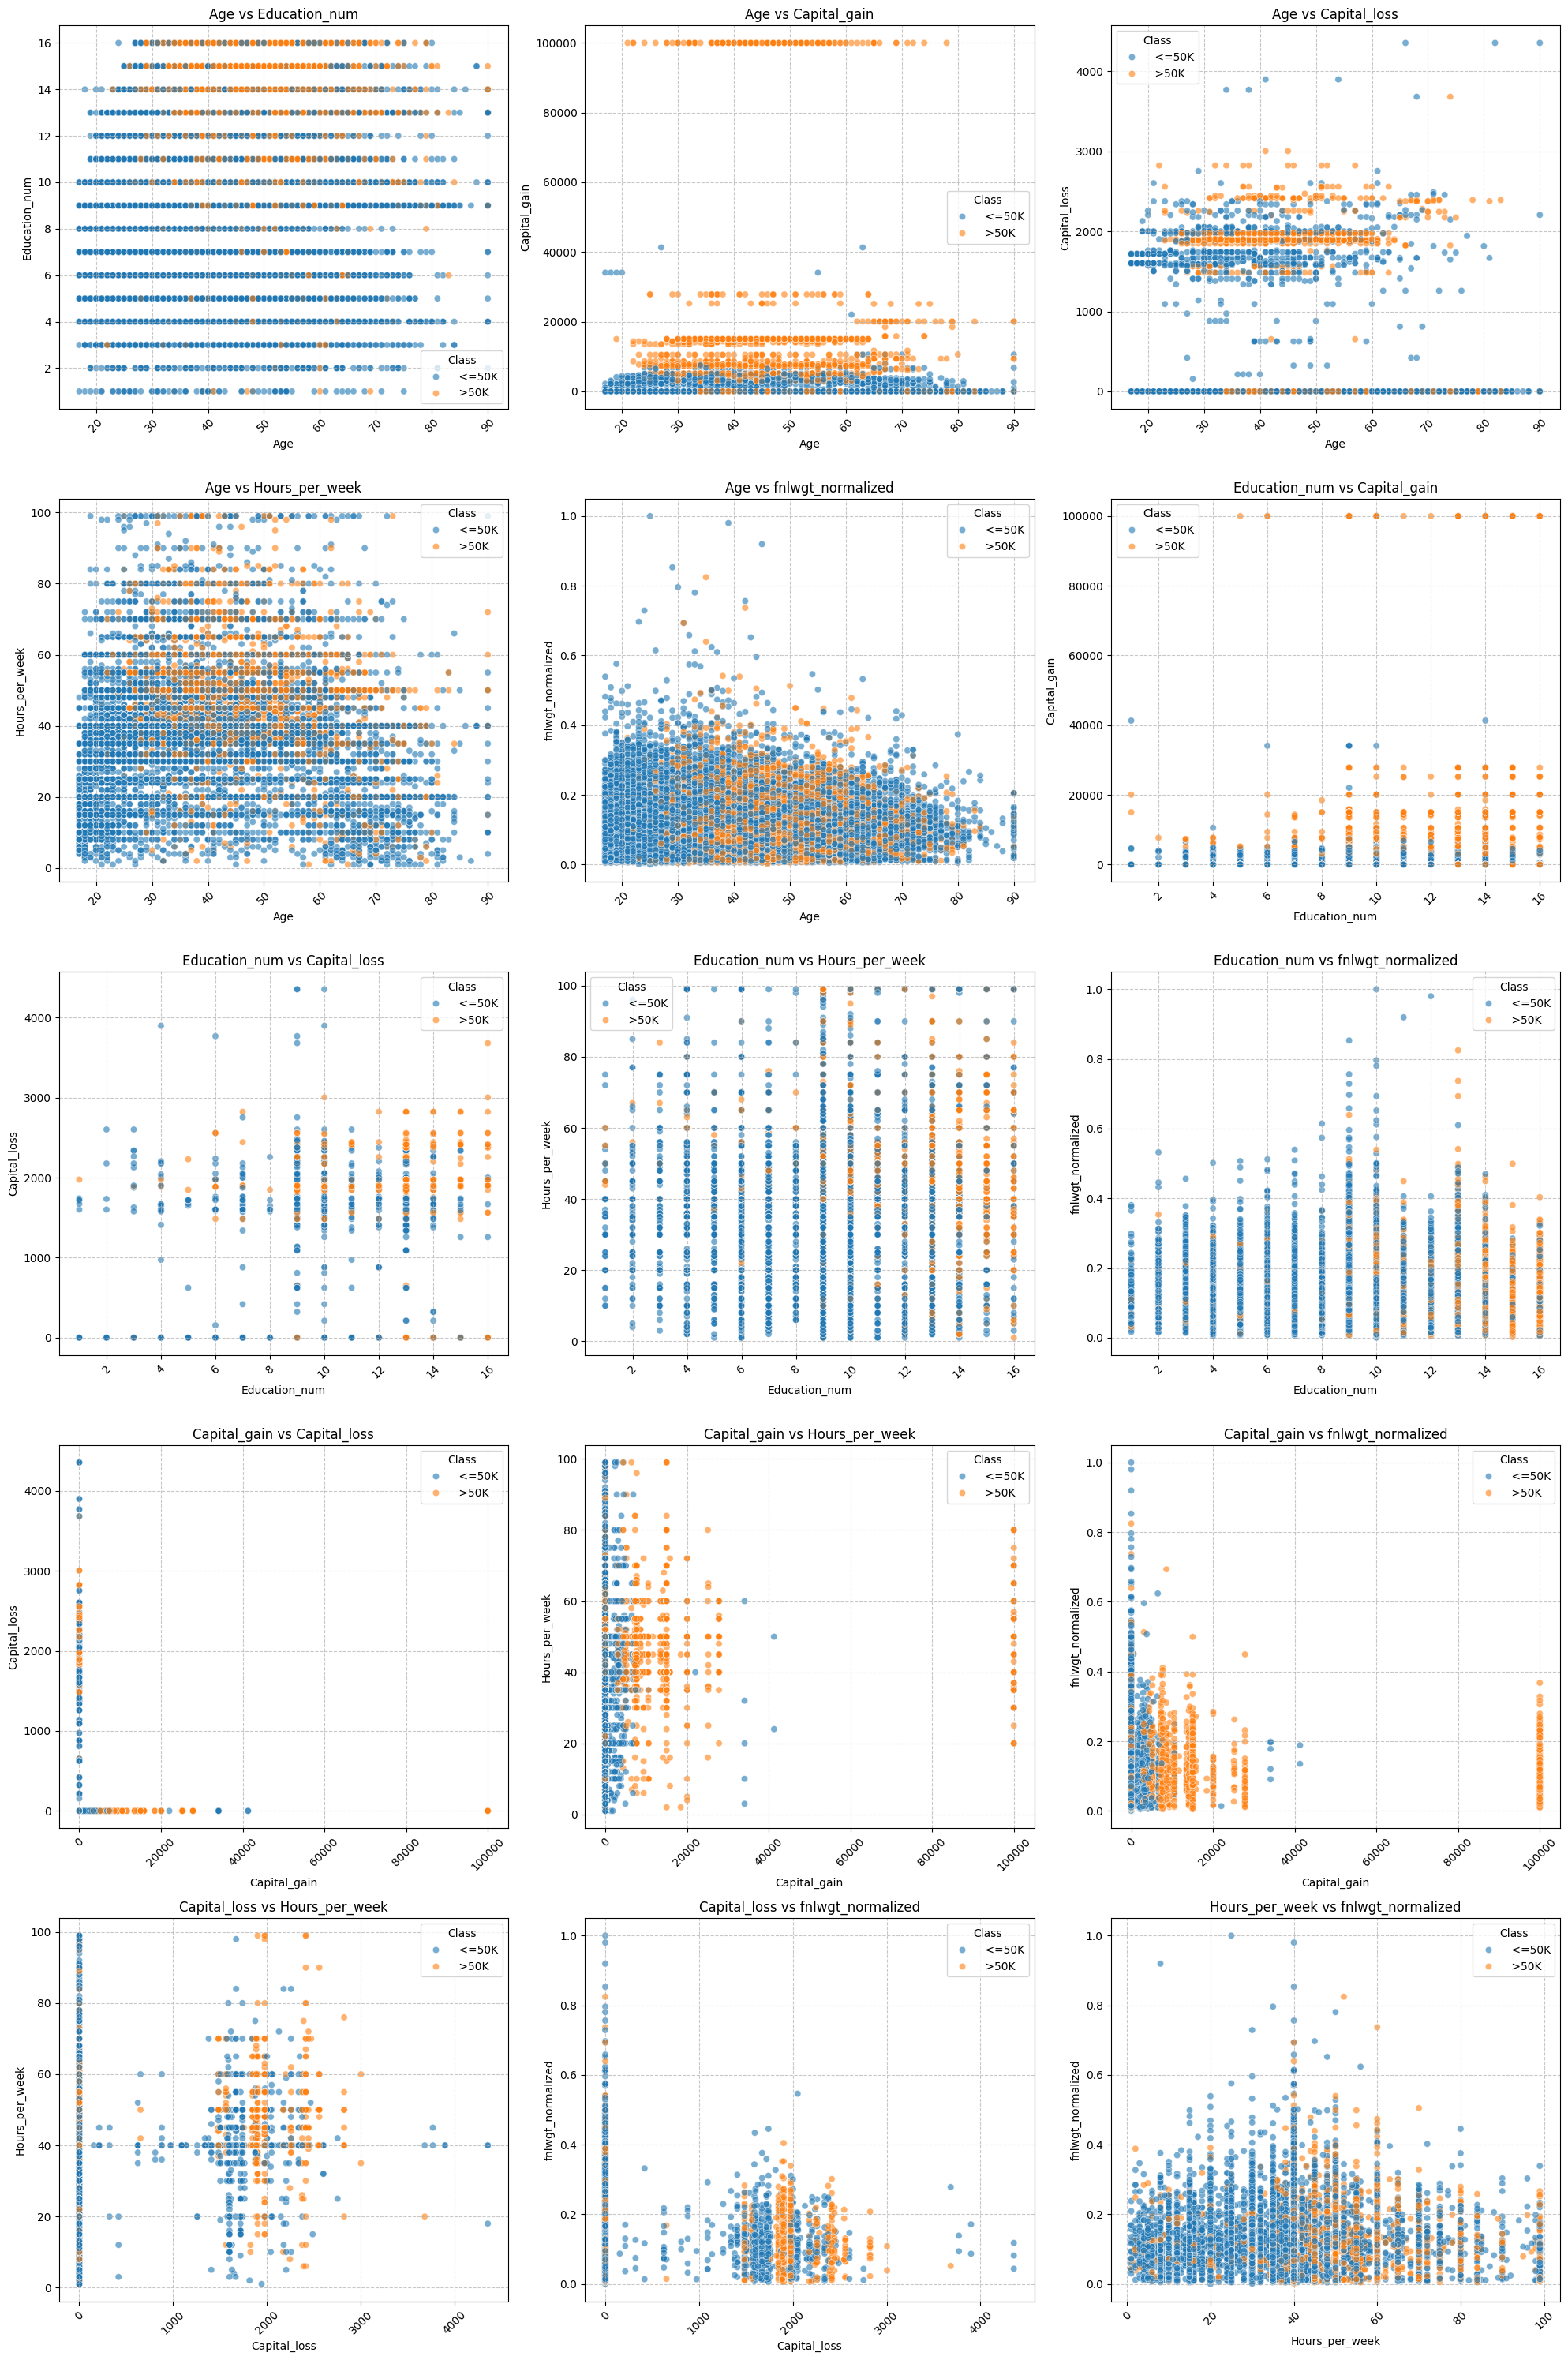

In [8]:
# Seleccionamos todas las variables numéricas
numeric_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 
                  'Hours_per_week', 'fnlwgt_normalized']

# Obtenemos todas las combinaciones posibles de variables
combinations_list = list(combinations(numeric_columns, 2))

# Calculamos el número de filas y columnas necesarias para los subplots
n_plots = len(combinations_list)
n_cols = 3  # Podemos mostrar 3 gráficos por fila
n_rows = (n_plots + n_cols - 1) // n_cols

# Creamos la figura con los subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
# fig.suptitle('Diagramas de Dispersión por Clase', fontsize=16)

# Aplanamos el array de axes para facilitar la iteración
axes_flat = axes.flatten()

# Creamos un scatter plot para cada combinación de variables
for idx, (x_var, y_var) in enumerate(combinations_list):
    sns.scatterplot(data=df, 
                   x=x_var, 
                   y=y_var, 
                   hue='Class',
                   alpha=0.6,
                   ax=axes_flat[idx])
    
    axes_flat[idx].set_title(f'{x_var} vs {y_var}')
    axes_flat[idx].grid(True, linestyle='--', alpha=0.7)
    
    # Rotamos las etiquetas del eje x para mejor legibilidad
    axes_flat[idx].tick_params(axis='x', rotation=45)

# Eliminamos los subplots vacíos si los hay
for idx in range(len(combinations_list), len(axes_flat)):
    fig.delaxes(axes_flat[idx])

# Ajustamos el layout
plt.tight_layout()
plt.show()

## Relaciones con Age (Edad).

- **Age vs Education_num:** No hay una correlación clara, aunque se observa que la educación superior (>12) tiene una mayor proporción de personas con ingresos >50K.

- **Age vs Capital_gain:** Mayor concentración de ganancias de capital altas en edades entre 30-60 años, especialmente para la clase >50K.

- **Age vs Capital_loss:** Pérdidas de capital más frecuentes en edades medias (35-55 años).

- **Age vs Hours_per_week:** Concentración alrededor de 40 horas, con mayor variabilidad en edades medias.

- **Age vs fnlwgt_normalized:** Muestra una ligera tendencia decreciente con la edad.

## Relaciones con Education_num.

- **Education_num vs Capital_gain:** Mayor probabilidad de ganancias de capital altas en niveles educativos superiores.

- **Education_num vs Capital_loss:** Pérdidas de capital más frecuentes en niveles educativos altos.

- **Education_num vs Hours_per_week:** No hay correlación clara, aunque niveles educativos más altos tienen más variabilidad en horas.

- **Education_num vs fnlwgt_normalized:** No muestra una relación clara.

## Relaciones con Capital_gain.

- **Capital_gain vs Capital_loss:** No hay una relación clara entre pérdidas y ganancias.

- **Capital_gain vs Hours_per_week:** Las personas con altas ganancias de capital tienden a trabajar entre 40-60 horas.

- **Capital_gain vs fnlwgt_normalized:** No muestra una relación significativa.

## Relaciones con Capital_loss.

- **Capital_loss vs Hours_per_week:** No hay un patrón claro de relación.

- **Capital_loss vs fnlwgt_normalized:** No muestra una relación significativa.

## Relaciones con Hours_per_week.

- **Hours_per_week vs fnlwgt_normalized:** Muestra una ligera tendencia negativa.

<font size="9" color="red">Patrones generales observados.</font>

## La clase >50K (naranja) tiende a estar más presente en:

- Niveles educativos más altos

- Mayores ganancias de capital

- Más horas trabajadas por semana

- Edades medias (35-55 años)

## Variables más influyentes para predecir ingresos >50K:

- Education_num (nivel educativo)

- Capital_gain (ganancias de capital)

- Hours_per_week (horas trabajadas)

## Variables menos predictivas:

- fnlwgt_normalized

- Capital_loss

- Age (aunque hay cierta tendencia en edades medias)

## Observaciones importantes:

- Hay una fuerte concentración de trabajo alrededor de 40 horas semanales

- Las ganancias y pérdidas de capital son más comunes en niveles educativos altos

- La edad por sí sola no es un fuerte predictor de ingresos, pero en combinación con educación y horas trabajadas puede ser relevante

<font size="9" color="red">Preguntas.</font>

### a. ¿Qué puedes decir de las edades con respecto a la ganancia anual?
Analizando la relación entre edad y ganancia anual, se observa que las personas con ingresos superiores a 50K se concentran principalmente en el rango de edad de 30-60 años, con una mayor concentración entre los 35-50 años. Es notable que hay muy pocas personas jóvenes (menores de 25 años) o mayores de 70 años que ganen más de 50K. Sin embargo, la edad por sí sola no es un factor determinante, ya que en todos los rangos de edad se pueden encontrar personas en ambas categorías de ingresos.

### b. ¿Puedes afirmar que las personas que poseen un nivel educativo por debajo de 8 y que trabajan menos de 40 horas no ganan más de 50 mil dólares por año?
Respecto a las personas con nivel educativo menor a 8 y que trabajan menos de 40 horas, si bien es mayoritariamente cierto que no ganan más de 50K, existen algunas excepciones como se puede observar en los puntos naranjas del gráfico Education_num vs Hours_per_week. Por lo tanto, aunque esta combinación hace muy improbable ganar más de 50K, no se puede afirmar de manera absoluta que sea imposible.

### c. ¿Existe alguna relación entre el nivel educativo y el hecho de ganar más de 50 mil dólares por año?
Existe una clara relación positiva entre el nivel educativo y ganar más de 50K por año. Se observa un punto de inflexión importante alrededor del nivel 12 (equivalente a secundaria completa), y los niveles educativos más altos (13-16) muestran una proporción significativamente mayor de personas con ingresos superiores a 50K. Sin embargo, esta relación no es determinante, ya que hay personas con alta educación que ganan menos de 50K y viceversa.

### d. ¿Hay alguna relación con la cantidad de horas semanales trabajadas?
Existe una clara relación positiva entre el nivel educativo y ganar más de 50K por año. Se observa un punto de inflexión importante alrededor del nivel 12 (equivalente a secundaria completa), y los niveles educativos más altos (13-16) muestran una proporción significativamente mayor de personas con ingresos superiores a 50K. Sin embargo, esta relación no es determinante, ya que hay personas con alta educación que ganan menos de 50K y viceversa.